<a href="https://colab.research.google.com/github/adrian-str/Hands-on_ML/blob/main/Chapter9_DimRed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train=pd.read_csv("/content/drive/MyDrive/data/train.csv")

In [6]:
len(train)

42000

In [21]:
y=train["label"]
X=train.drop(["label"],axis=1)

In [22]:
X_train,X_test,y_train,y_test=X[:36000],X[36000:],y[:36000],y[36000:]

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
rf_clf=RandomForestClassifier(random_state=42)

In [44]:
import time
t0=time.time()
rf_clf.fit(X_train,y_train)
t1=time.time()
print("Elapsed time: ",t1-t0)

Elapsed time:  27.1268630027771


In [27]:
%time rf_clf.fit(X_train_sca,y_train)

CPU times: user 26.6 s, sys: 14.3 ms, total: 26.6 s
Wall time: 26.7 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred=y_pred,y_true=y_test)

0.9666666666666667

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_reduced=pca.fit_transform(X_train)
X_test_reduced=pca.transform(X_test)

In [45]:
import time
t0=time.time()
rf_clf.fit(X_train_reduced,y_train)
t1=time.time()
print("Elapsed time: ",t1-t0)

Elapsed time:  63.062132120132446


In [48]:
y_pred=rf_clf.predict(X_test_reduced)

In [49]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.9456666666666667

In [54]:
from sklearn.manifold import TSNE
tsne=TSNE()
Xts=tsne.fit_transform(X)

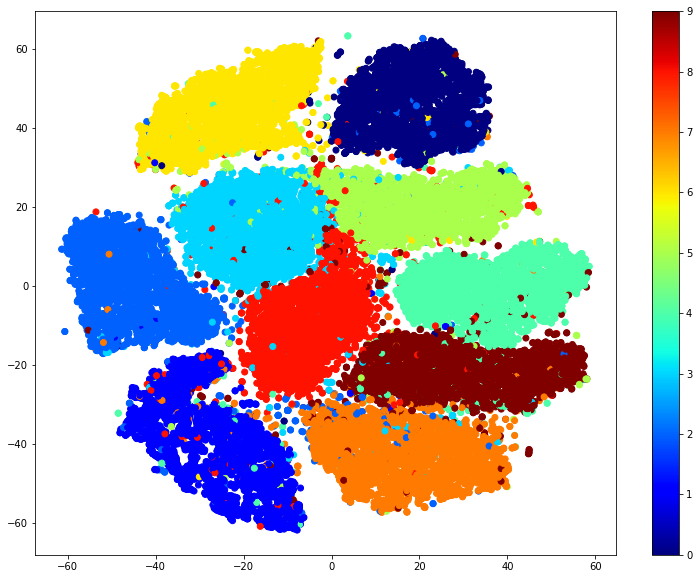

In [63]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.scatter(Xts[:,0],Xts[:,1],c=y,cmap="jet")
plt.colorbar()

In [55]:
pca=PCA(n_components=2)
Xp=pca.fit_transform(X)

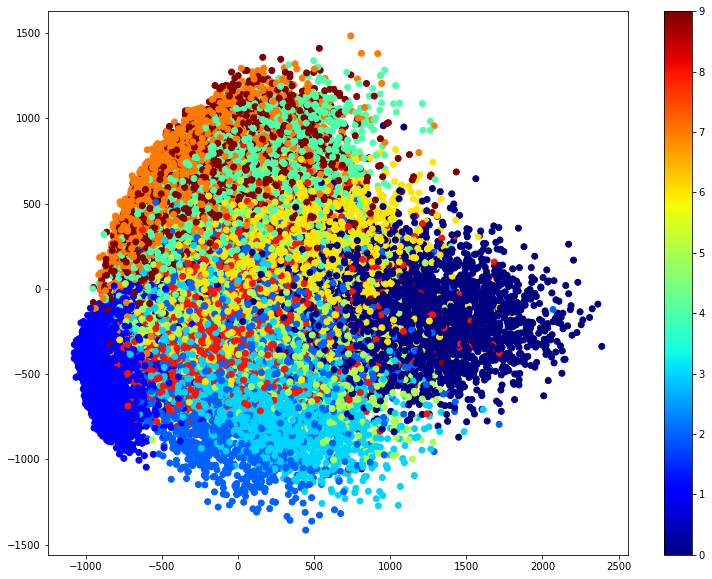

In [64]:
plt.figure(figsize=(13,10))
plt.scatter(Xp[:,0],Xp[:,1],c=y,cmap="jet")
plt.colorbar()

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10)
Xll=lle.fit_transform(X)